In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from functools import partial
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
def stlr(t, T=1000, cut_frac=0.1, ratio=32, lr_max=0.01):
    cut = int(T * cut_frac)
    p = np.where(t < cut, t / cut, 1 - (t - cut) / cut / (1 / cut_frac - 1))
    return lr_max * (1 + p * ratio - p) / ratio 

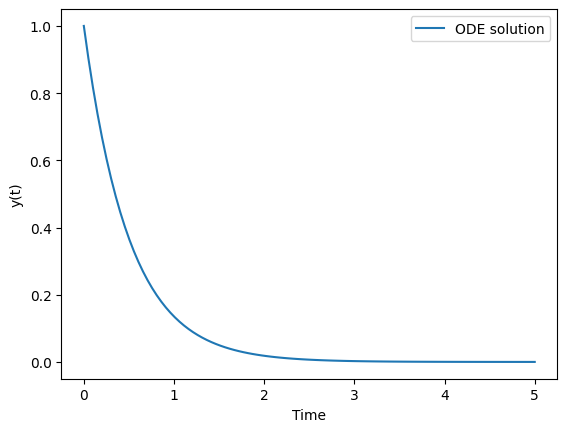

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ode_function(t, y):
    return -2 * y  # Example: dy/dt = -2y

def runge_kutta_4th_order(t, y, h):
    k1 = h * ode_function(t, y)
    k2 = h * ode_function(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * ode_function(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * ode_function(t + h, y + k3)
    
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial conditions
t0 = 0
y0 = 1

# Time span
t_span = np.linspace(t0, 5, 100)

# Solve the ODE using RK4
y_solution = [y0]
h = t_span[1] - t_span[0]

for t in t_span[1:]:
    y_next = runge_kutta_4th_order(t, y_solution[-1], h)
    y_solution.append(y_next)

# Plot the solution
plt.plot(t_span, y_solution, label='ODE solution')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()


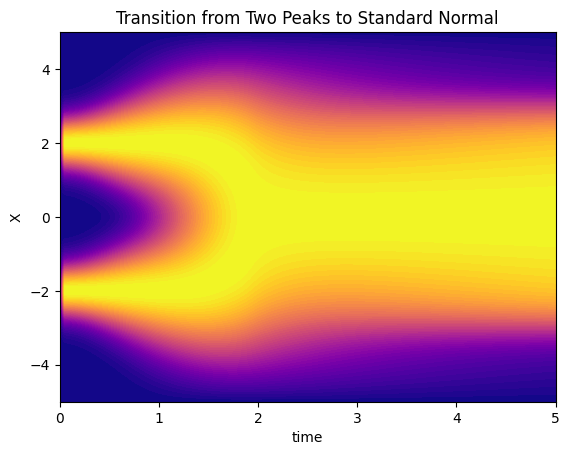

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
resolution = 1000  # Number of points in the x axis
timesteps = 100  # Number of time steps
mu1, sigma1 = -2, 0.5  # Parameters for the first peak
mu2, sigma2 = 2, 0.5   # Parameters for the second peak

def data_dist(x):
    return 0.5*(norm.pdf(x, mu1, sigma1) + norm.pdf(x, mu2, sigma2))

def sigma(t):
    return t

def scale(t):
    return 1


x = np.linspace(-5, 5, resolution)
time_values = np.linspace(0, 5, timesteps)

X, T = np.meshgrid(x, time_values)


Z = np.zeros_like(X)
for i, t in enumerate(time_values):
    n = norm.pdf(x, 0, sigma(t)+1e-8)
    density =  np.convolve(data_dist(x*scale(t)), n, mode='same')
    density = (density - density.min()) / (1e-8+density.max() - density.min())
    Z[i, :] = density


fig, ax = plt.subplots()

ax.contourf(T, X, Z, cmap='plasma', levels=50)

# Add labels and title
ax.set_xlabel('time')
ax.set_ylabel('X')
ax.set_title('Transition from Two Peaks to Standard Normal')

plt.show()

